# <center>Study of UrbanSound8K Classes Acoustics Signature</center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries-Import" data-toc-modified-id="Libraries-Import-1">Libraries Import</a></span></li><li><span><a href="#Import-of-the-Metadata-File" data-toc-modified-id="Import-of-the-Metadata-File-2">Import of the Metadata File</a></span></li><li><span><a href="#Torchaudio-Transforms" data-toc-modified-id="Torchaudio-Transforms-3">Torchaudio Transforms</a></span><ul class="toc-item"><li><span><a href="#Spectrogram" data-toc-modified-id="Spectrogram-3.1">Spectrogram</a></span></li><li><span><a href="#Mel-Spectrogram" data-toc-modified-id="Mel-Spectrogram-3.2">Mel-Spectrogram</a></span></li><li><span><a href="#MFCC" data-toc-modified-id="MFCC-3.3">MFCC</a></span></li><li><span><a href="#Amplitude-to-dB" data-toc-modified-id="Amplitude-to-dB-3.4">Amplitude to dB</a></span></li></ul></li><li><span><a href="#Audio-Processing-Parameters" data-toc-modified-id="Audio-Processing-Parameters-4">Audio Processing Parameters</a></span></li><li><span><a href="#Comparison-of-Multiple-Audios-From-the-Same-Class" data-toc-modified-id="Comparison-of-Multiple-Audios-From-the-Same-Class-5">Comparison of Multiple Audios From the Same Class</a></span><ul class="toc-item"><li><span><a href="#Selection-of-Audios" data-toc-modified-id="Selection-of-Audios-5.1">Selection of Audios</a></span></li><li><span><a href="#Temporal-Representation" data-toc-modified-id="Temporal-Representation-5.2">Temporal Representation</a></span></li><li><span><a href="#Spectrogram" data-toc-modified-id="Spectrogram-5.3">Spectrogram</a></span></li><li><span><a href="#Mel-Spectrogram" data-toc-modified-id="Mel-Spectrogram-5.4">Mel-Spectrogram</a></span></li><li><span><a href="#MFCCs" data-toc-modified-id="MFCCs-5.5">MFCCs</a></span></li></ul></li><li><span><a href="#Comparison-of-Classes" data-toc-modified-id="Comparison-of-Classes-6">Comparison of Classes</a></span><ul class="toc-item"><li><span><a href="#Selection-Of-One-Audio-Per-Class" data-toc-modified-id="Selection-Of-One-Audio-Per-Class-6.1">Selection Of One Audio Per Class</a></span></li><li><span><a href="#Comparison-Of-Features" data-toc-modified-id="Comparison-Of-Features-6.2">Comparison Of Features</a></span></li></ul></li></ul></div>

## Libraries Import

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
import IPython
import datetime
import torch
import torch.nn as nn
import torchaudio
import torchaudio.transforms as transforms

## Import of the Metadata File

In [2]:
metadata = pd.read_csv("dataset/UrbanSound8K.csv")
metadata

slice_file_name    fsID       start         end  salience  fold  \
0       100032-3-0-0.wav  100032    0.000000    0.317551         1     5   
1     100263-2-0-117.wav  100263   58.500000   62.500000         1     5   
2     100263-2-0-121.wav  100263   60.500000   64.500000         1     5   
3     100263-2-0-126.wav  100263   63.000000   67.000000         1     5   
4     100263-2-0-137.wav  100263   68.500000   72.500000         1     5   
...                  ...     ...         ...         ...       ...   ...   
8727     99812-1-2-0.wav   99812  159.522205  163.522205         2     7   
8728     99812-1-3-0.wav   99812  181.142431  183.284976         2     7   
8729     99812-1-4-0.wav   99812  242.691902  246.197885         2     7   
8730     99812-1-5-0.wav   99812  253.209850  255.741948         2     7   
8731     99812-1-6-0.wav   99812  332.289233  334.821332         2     7   

      classID             class  
0           3          dog_bark  
1           2  children_playing  
2           2  children_playing  
3           2  children_playing  
4           2  children_playing  
...       ...               ...  
8727        1          car_horn  
8728        1          car_horn  
8729        1          car_horn  
8730        1          car_horn  
8731        1          car_horn  

[8732 rows x 8 columns]

## Torchaudio Transforms

### Spectrogram

In [3]:
spectrogram_transform = torchaudio.transforms.Spectrogram( 
                    # Size of FFT, creates n_fft // 2 + 1 bins. (Default: 400)
                    n_fft = 256,
                    # Window size. (Default: n_fft)
                    win_length = 256,
                    # Length of hop between STFT windows. (Default: win_length // 2)
                    hop_length = 128,
                    # Two sided padding of signal. (Default: 0)
                    pad = 0,
                    # A function to create a window tensor that is applied/multiplied to each frame/window. (Default: torch.hann_window)
                    window_fn = torch.hann_window,
                    # Exponent for the magnitude spectrogram, (must be > 0) e.g., 1 for energy, 2 for power, etc. (Default: 2)
                    power = 2,
                    # Whether to normalize by magnitude after stft. (Default: False)
                    normalized = True,
                    # Arguments for window function. (Default: None)
                    wkwargs = None,
                    # Whether to pad waveform on both sides so that the t-th frame is centered at time t x hop_length (Default: True)
                    center = False,
                    # Controls the padding method used when center is True. (Default: "reflect")
                    pad_mode = "reflect",
                    # Controls whether to return half of results to avoid redundancy. (Default: True)
                    onesided = True,
                    # Indicates whether the resulting complex-valued Tensor should be represented with native complex dtype, 
                    # such as torch.cfloat and torch.cdouble, or real dtype mimicking complex value with an extra dimension 
                    # for real and imaginary parts. (See also torch.view_as_real.)
                    # This argument is only effective when power=None. It is ignored for cases where power is a number as in those cases, the returned tensor is power spectrogram, which is a real-valued tensor.
                    return_complex = False
                    )   

### Mel-Spectrogram

In [4]:
mel_spectrogram_transform = torchaudio.transforms.MelSpectrogram(
                    # Sample rate of audio signal. (Default: 16000)
                    sample_rate = 22050,
                    # Size of FFT, creates n_fft // 2 + 1 bins. (Default: 400)
                    n_fft = 256,
                    # Window size. (Default: n_fft)
                    win_length = 256,
                    # Length of hop between STFT windows. (Default: win_length // 2)
                    hop_length = 128,
                    # Minimum frequency. (Default: 0.)
                    f_min = 0.,
                    # Maximum frequency. (Default: None)
                    f_max = 20000,
                    # Two sided padding of signal. (Default: 0)    
                    pad = 0,
                    # Number of mel filterbanks. (Default: 128)
                    n_mels = 128,
                    # A function to create a window tensor that is applied/multiplied to each frame/window. (Default: torch.hann_window)
                    window_fn = torch.hann_window,
                    # Exponent for the magnitude spectrogram, (must be > 0) e.g., 1 for energy, 2 for power, etc. (Default: 2)
                    power = 2,
                    # Whether to normalize by magnitude after stft. (Default: False)
                    normalized = True,
                    # Arguments for window function. (Default: None)
                    wkwargs = None, 
                    # Whether to pad waveform on both sides so that the t-th frame is centered at time t x hop_length (Default: True)
                    center = True, 
                    # Controls the padding method used when center is True. (Default: "reflect")
                    pad_mode = "reflect", 
                    # Controls whether to return half of results to avoid redundancy. (Default: True)
                    onesided = True, 
                    # If 'slaney', divide the triangular mel weights by the width of the mel band (area normalization). (Default: None)
                    norm = None,
                    # Scale to use: htk or slaney. (Default: "htk")
                    mel_scale = "htk"
                    )

C:\Users\APU\anaconda3\lib\site-packages\torchaudio\functional\functional.py:594: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (129) may be set too low.
  warnings.warn(


### MFCC

In [5]:
mfcc_transform = torchaudio.transforms.MFCC(
                    # Sample rate of audio signal. (Default: 16000)
                    sample_rate = 22050,
                    # Number of mfc coefficients to retain. (Default: 40)
                    n_mfcc = 40,
                    # Type of DCT (discrete cosine transform) to use. (Default: 2)
                    dct_type = 2,
                    # Norm to use. (Default: "ortho")
                    norm = "ortho", 
                    # Whether to use log-mel spectrograms instead of db-scaled. (Default: False)
                    log_mels = True,
                    # Arguments for MelSpectrogram (Default: None)
                    melkwargs = None
                    )

C:\Users\APU\anaconda3\lib\site-packages\torchaudio\functional\functional.py:594: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


### Amplitude to dB

In [6]:
amplitude_to_db_transform = torchaudio.transforms.AmplitudeToDB(
                    # Scale of input tensor ("power" or "magnitude"). The power being the elementwise square of the magnitude. (Default: "power")
                    stype = "power",
                    # Minimum negative cut-off in decibels. A reasonable number is 80. (Default: None)
                    top_db = None
                    )

## Audio Processing Parameters

In [7]:
target_length = 4
target_sample_rate = 22050
n_samples = target_length * target_sample_rate

## Comparison of Multiple Audios From the Same Class

For a recall, the different classes present in the UrbanSound8K dataset are:
- air_conditioner
- car_horn
- children_playing
- dog_bark
- drilling
- engine_idling
- gun_shot
- jackhammer
- siren
- street_music

### Selection of Audios

In [8]:
# Input annotations filtering critera
label = "air_conditioner"
salience = 1 
n_audios = 10

# Filter annotations based on criteria
filtered_metadata = metadata.loc[
    (metadata["class"]==label)
    & (metadata["salience"]==salience)
    ]

# Randomly select an audio from the filtered annotations
selected_audios = filtered_metadata.sample(n=n_audios) 
display(selected_audios)

slice_file_name    fsID      start        end  salience  fold  \
1888   146709-0-0-66.wav  146709  33.000000  37.000000         1     4   
34      100852-0-0-2.wav  100852   1.000000   5.000000         1     5   
1843  146690-0-0-112.wav  146690  56.000000  60.000000         1     2   
4545    185709-0-0-8.wav  185709   4.000000   8.000000         1     4   
3129    165454-0-0-3.wav  165454   1.500000   5.500000         1     9   
5412   204240-0-0-30.wav  204240  15.000000  19.000000         1     6   
6745     54383-0-0-2.wav   54383   1.000000   5.000000         1     8   
6805   55018-0-0-110.wav   55018  59.041583  63.041583         1     4   
5244    202516-0-0-1.wav  202516   0.500000   4.500000         1     7   
4793    189989-0-0-1.wav  189989   0.500000   4.500000         1     9   

      classID            class  
1888        0  air_conditioner  
34          0  air_conditioner  
1843        0  air_conditioner  
4545        0  air_conditioner  
3129        0  air_conditioner  
5412        0  air_conditioner  
6745        0  air_conditioner  
6805        0  air_conditioner  
5244        0  air_conditioner  
4793        0  air_conditioner

In [9]:
# Creation of a dictionnary to store each of the selected audio paths and their corresponding pre-processed temporal signal
audios_signal = {}

for index, row in selected_audios.iterrows():
    audio_filename = row["slice_file_name"]
    audio_fold = f"fold{row['fold']}"
    audio_path = os.path.join("dataset", audio_fold, audio_filename)
    # Load the audio signal
    audio_signal, sr = torchaudio.load(audio_path)
    # Mix it down to mono if necessary
    if audio_signal.shape[0] > 1:
        audio_signal = torch.mean(audio_signal, dim=0, keepdim=True)
    # Resample it
    resample_transform = transforms.Resample(sr, target_sample_rate)
    audio_signal = resample_transform(audio_signal)
    # Cut if necessary
    if audio_signal.shape[1] > n_samples:
        audio_signal = audio_signal[:, :n_samples]
    # Right pad if necessary
    if audio_signal.shape[1] < n_samples:
        n_missing_samples = n_samples - audio_signal.shape[1]
        last_dim_padding = (0, n_missing_samples)
        audio_signal = nn.functional.pad(audio_signal, last_dim_padding)
    audios_signal[audio_path] = audio_signal

### Temporal Representation

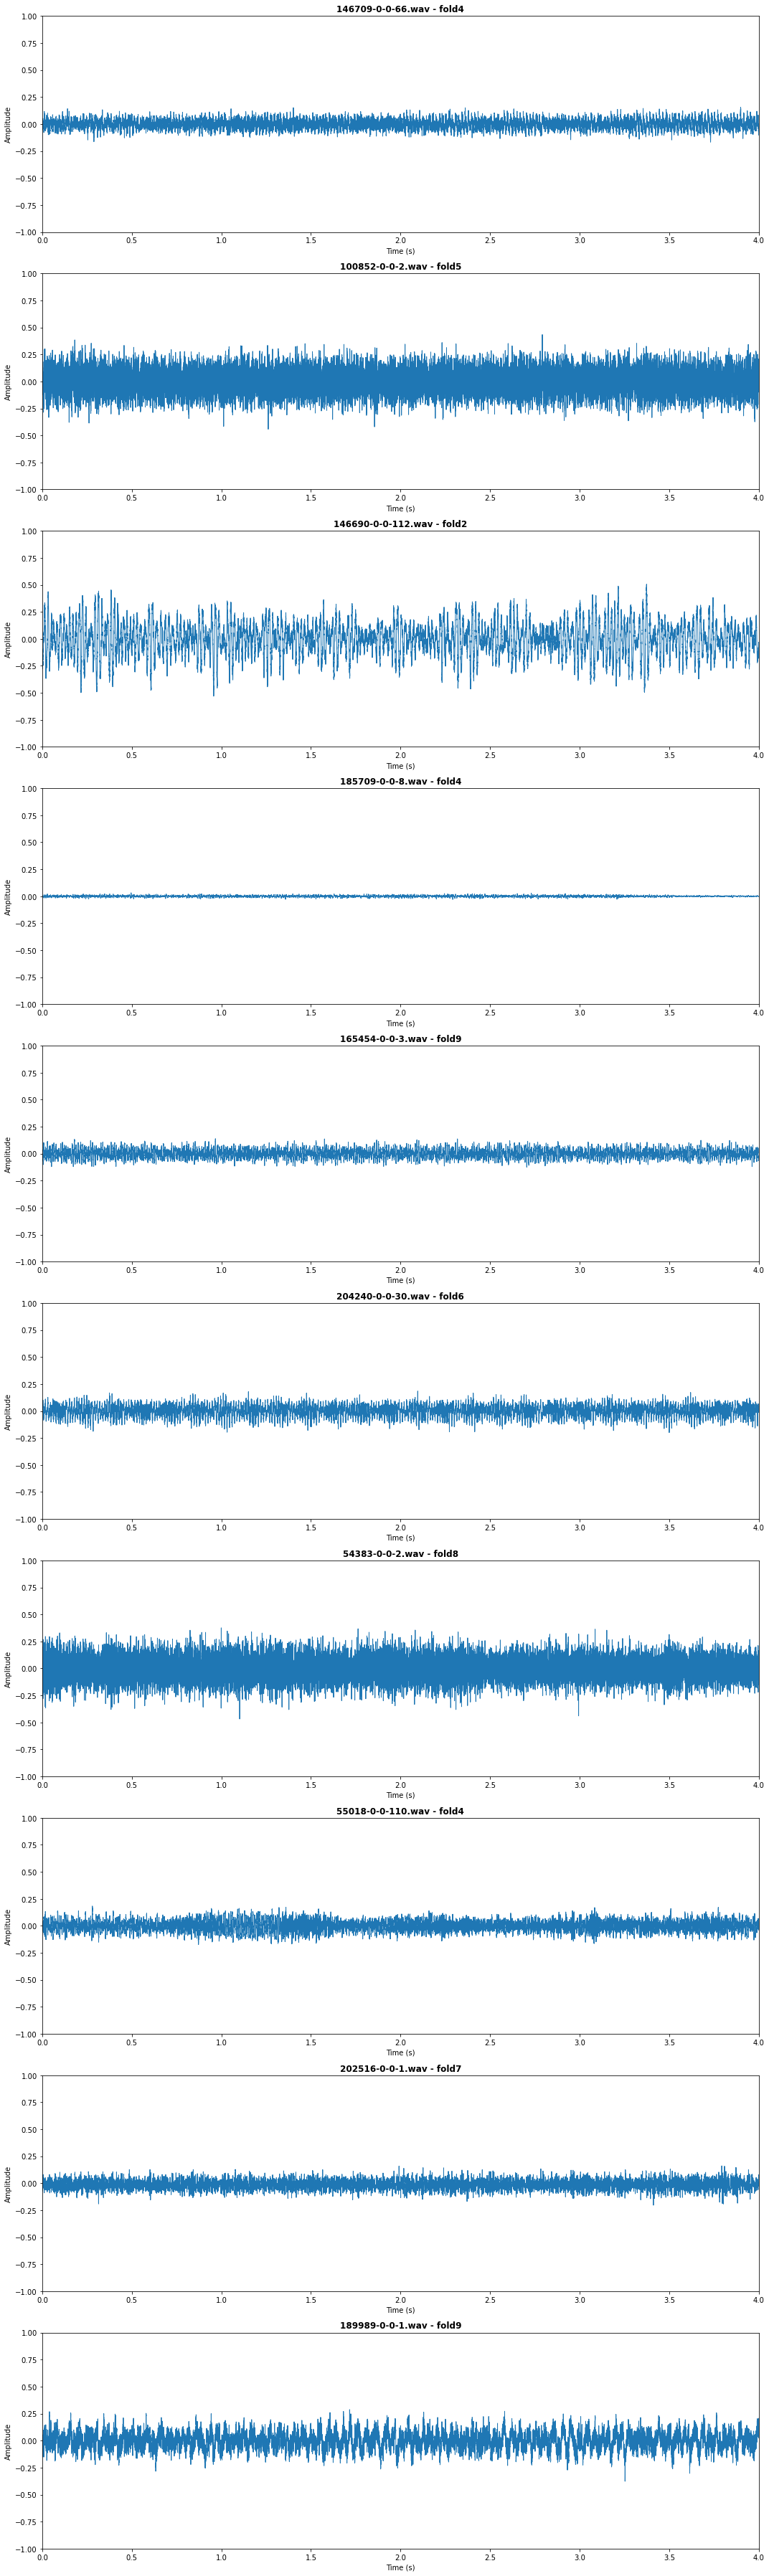

In [13]:
fig, axs = plt.subplots(len(selected_audios),1, figsize=(15, 50))

for i, (audio_path, audio_signal) in enumerate(audios_signal.items()):
    
    audio_path_splits = audio_path.split("\\")
    fold = audio_path_splits[1]
    audio_name = audio_path_splits[2]
                                         
    num_channels, num_frames = audio_signal.shape
    time_axis = torch.arange(0, num_frames) / target_sample_rate
    
    axs[i].plot(time_axis, audio_signal[0], linewidth=1)
    axs[i].set_title(f"{audio_name} - {fold}", fontweight="bold")
    axs[i].set_ylabel("Amplitude")
    axs[i].set_xlabel("Time (s)")
    axs[i].set_xlim([0, 4])    
    axs[i].set_ylim([-1, 1])
    
plt.tight_layout()
plt.show()

### Spectrogram

In [ ]:
fig, axs = plt.subplots(len(selected_audios),1, figsize=(15, 50))

for i, (audio_path, audio_signal) in enumerate(audios_signal.items()):
    
    audio_path_splits = audio_path.split("\\")
    fold = audio_path_splits[1]
    audio_name = audio_path_splits[2]
    
    num_channels, num_frames = audio_signal.shape
    time_axis = torch.arange(0, num_frames) / target_sample_rate
    
    spectrogram = torch.squeeze(spectrogram_transform(audio_signal)[0])
    spectrogram_db = amplitude_to_db_transform(spectrogram)
    
    n_fft_spec = (spectrogram_db.shape[0] - 1) * 2
    frequency = (target_sample_rate / n_fft_spec) * np.linspace(0, n_fft_spec/2, spectrogram_db.shape[0])
    max_frequency_bin = frequency.max()
    
    axs[i].imshow(spectrogram_db, extent=[0, target_length, 0, target_sample_rate/2], origin="lower", aspect="auto")
    axs[i].set_title(f"{audio_name} - {fold}", fontweight="bold")
    axs[i].set_ylabel("Frequency (Hz)")
    axs[i].set_xlabel("Time (s)")
    
plt.tight_layout()
plt.show()

### Mel-Spectrogram

In [ ]:
fig, axs = plt.subplots(len(selected_audios),1, figsize=(15, 50))

for i, (audio_path, audio_signal) in enumerate(audios_signal.items()):
    
    audio_path_splits = audio_path.split("\\")
    fold = audio_path_splits[1]
    audio_name = audio_path_splits[2]
    
    num_channels, num_frames = audio_signal.shape
    time_axis = torch.arange(0, num_frames) / target_sample_rate
    
    mel_spectrogram = torch.squeeze(mel_spectrogram_transform(audio_signal)[0])
    
    axs[i].imshow(mel_spectrogram, extent=[0, target_length, 0, mel_spectrogram.shape[0]+1], origin="lower", aspect="auto")
    axs[i].set_title(f"{audio_name} - {fold}", fontweight="bold")
    axs[i].set_ylabel("Mel Bands")
    axs[i].set_xlabel("Time (s)")
    
plt.tight_layout()
plt.show()

### MFCCs

In [ ]:
fig, axs = plt.subplots(len(selected_audios),1, figsize=(15, 50))

for i, (audio_path, audio_signal) in enumerate(audios_signal.items()):
    
    audio_path_splits = audio_path.split("\\")
    fold = audio_path_splits[1]
    audio_name = audio_path_splits[2]
    
    num_channels, num_frames = audio_signal.shape
    time_axis = torch.arange(0, num_frames) / target_sample_rate
    
    mfcc = torch.squeeze(mfcc_transform(audio_signal)[0])
    
    axs[i].imshow(mfcc, extent=[0, target_length, 0, mfcc.shape[0]+1], origin="lower", aspect="auto")
    axs[i].set_title(f"{audio_name} - {fold}", fontweight="bold")
    axs[i].set_ylabel("MFCC")
    axs[i].set_xlabel("Time (s)")
    
plt.tight_layout()
plt.show()

## Comparison of Classes

### Selection Of One Audio Per Class

In [ ]:
classes = metadata["class"].unique()
selected_audios = {classe: np.nan for classe in classes}

for classe in classes:
    metadata_classe = metadata[metadata["class"]==classe]
    selected_audio = metadata_classe.sample(n=1) 
    selected_audio_filename = selected_audio.iloc[0]["slice_file_name"]
    selected_audio_fold = f"fold{selected_audio.iloc[0]['fold']}"
    selected_audio_path = os.path.join("dataset", selected_audio_fold, selected_audio_filename)
    selected_audios[classe] = selected_audio_path

### Comparison Of Features

In [ ]:
fig = plt.figure(figsize=(20,80), constrained_layout=True)
subfigs = fig.subfigures(len(selected_audios), 1)

for i, (classe, audio_path) in enumerate(selected_audios.items()):
    # Load the audio signal
    audio_signal, sr = torchaudio.load(audio_path)
    # Mix it down to mono if necessary
    if audio_signal.shape[0] > 1:
        audio_signal = torch.mean(audio_signal, dim=0, keepdim=True)
    # Resample it
    resample_transform = transforms.Resample(sr, target_sample_rate)
    audio_signal = resample_transform(audio_signal)
    # Cut if necessary
    if audio_signal.shape[1] > n_samples:
        audio_signal = event_signal[:, :n_samples]
    # Right pad if necessary
    if audio_signal.shape[1] < n_samples:
        n_missing_samples = n_samples - audio_signal.shape[1]
        last_dim_padding = (0, n_missing_samples)
        audio_signal = nn.functional.pad(audio_signal, last_dim_padding)
        
    ### Compute the Spectrogram
    spectrogram = torch.squeeze(spectrogram_transform(audio_signal)[0])
    spectrogram_db = amplitude_to_db_transform(spectrogram)
    
    ### Compute the Mel-Spectrogram
    mel_spectrogram = torch.squeeze(mel_spectrogram_transform(audio_signal)[0])
    
    ### Compute the MFCCs
    mfcc = torch.squeeze(mfcc_transform(audio_signal)[0])

    subfig = subfigs[i]
    subfig.suptitle(classe, fontsize=16, fontweight="bold")
    axs = subfig.subplots(1, 3)
    axs[0].imshow(spectrogram_db, extent=[0, target_length, 0, target_sample_rate/2], origin="lower", aspect="auto")
    axs[0].set_title("Spectrogram")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Frequency (Hz)")    
    axs[1].imshow(mel_spectrogram, extent=[0, target_length, 0, mel_spectrogram.shape[0]+1], origin="lower", aspect="auto")
    axs[1].set_title("Mel-Spectrogram")
    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("Mel Bands")    
    axs[2].imshow(mfcc, extent=[0, target_length, 0, mfcc.shape[0]+1], origin="lower", aspect="auto")
    axs[2].set_title("MFCC")
    axs[2].set_xlabel("Time (s)")
    axs[2].set_ylabel("MFCC")